In [ ]:
# Use seaborn for pairplot
!pip install seaborn

In [ ]:
#!pip freeze

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.14.0


In [ ]:
import io

spy = pd.read_csv(io.StringIO(uploaded['SPY.csv'].decode('utf-8')))
spy.head()


NameError: ignored

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

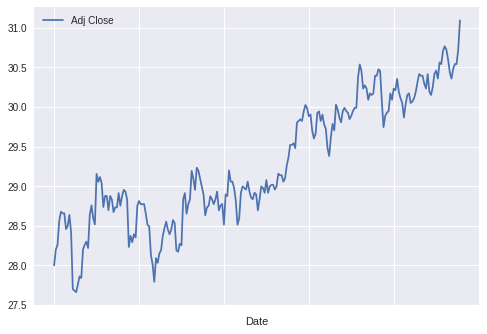

In [ ]:
spy[:24*10].plot(x='Date', y='Adj Close')

In [ ]:
dummy_fields = ['Day', 'Month']
for each in dummy_fields:
    dummies = pd.get_dummies(spy[each], prefix=each, drop_first=False)
    spy = pd.concat([spy, dummies], axis=1)

fields_to_drop = ['Date','Day', 'Month','Volume','High','Low','Open','Close','Adj Close','spyret']

data = spy.drop(fields_to_drop, axis=1)
data = data.dropna()
data.head()
print(data.shape)
data.T

(6052, 38)


,2,3,4,5,6,7,8,9,10,11,...,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053
Holiday,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
dvol,8.926387e+06,2.372374e+07,2.391750e+07,2.212910e+07,2.680584e+07,5452522.02,1.697522e+07,8.762812e+05,1.895232e+06,1.629207e+07,...,1.705050e+10,1.628059e+10,1.692730e+10,1.547551e+10,1.790145e+10,1.285517e+10,1.250354e+10,1.151592e+10,1.460925e+10,1.473105e+10
lspyret,7.112359e-03,2.117518e-03,1.057198e-02,4.184083e-03,-6.955520e-04,0.00,-6.949262e-03,1.399564e-03,4.892822e-03,-7.650640e-03,...,-1.569795e-03,-6.201677e-03,-8.790000e-05,3.955350e-04,6.590330e-04,6.892883e-03,-1.787752e-03,4.370000e-05,1.310400e-03,5.932651e-03
ldvol,2.126212e+07,8.926387e+06,2.372374e+07,2.391750e+07,2.212910e+07,26805842.07,5.452522e+06,1.697522e+07,8.762812e+05,1.895232e+06,...,1.289367e+10,1.705050e+10,1.628059e+10,1.692730e+10,1.547551e+10,1.790145e+10,1.285517e+10,1.250354e+10,1.151592e+10,1.460925e+10
Day_2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Day_3,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Day_4,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
Day_5,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
Day_6,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Month_1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
quant_features = ['lspyret','dvol','ldvol']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [ ]:
# Save the last 5 Years for Testing
test_window = -5*256
test_data = data[test_window:]
data = data[:test_window]

# Separate the data into features and targets
target_fields = ['dvol']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [ ]:
# Hold out the last 5 years of the remaining data as a validation set
train_features, train_targets = features[:test_window], targets[:test_window]
val_features, val_targets = features[test_window:], targets[test_window:]

In [ ]:
train_x = train_features
train_y = train_targets
test_x = val_features
test_y = val_targets


In [ ]:
#sns.pairplot(train_x, diag_kind="kde")
#train_x = train_x[['ldvol','lspyret']]

In [ ]:
print(data.shape,data.dropna().shape)



(4772, 38) (4772, 38)


In [ ]:
### Set the hyperparameters here ###
epochs = 10 # was 100
learning_rate = 0.01 # was 0.1
hidden_nodes = 15  # was 2
output_nodes = 1  # was 1


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(15, activation=tf.nn.leaky_relu, input_shape=[37]),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(learning_rate)
  optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False,clipvalue=0.5,clipnorm=1.0)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                380       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_x.shape


Now try out the model. Take a batch of `10` examples from the training data and call `model.predict` on it.

In [ ]:
example_batch = train_x[:10]
example_result = model.predict(example_batch)
example_result

It seems to be working, and it produces a result of the expected shape and type.

### Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [ ]:
history = model.fit(
  train_x, train_y,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

Visualize the model's training progress using the stats stored in the `history` object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,0.002151,0.029011,0.002151,0.036100,0.138253,0.036100,95
96,0.002126,0.028655,0.002126,0.036680,0.139606,0.036680,96
97,0.002111,0.028561,0.002111,0.037182,0.140278,0.037182,97
98,0.002103,0.028992,0.002103,0.035943,0.138120,0.035943,98
99,0.002106,0.028243,0.002106,0.036125,0.138622,0.036125,99


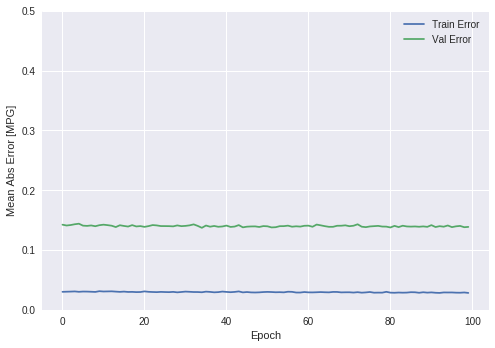

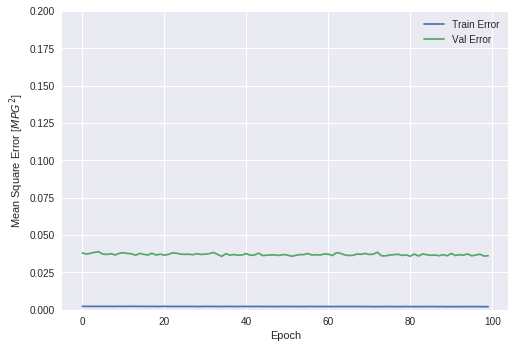

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,.5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,.20])
  plt.legend()
  plt.show()


plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).


..........................................................

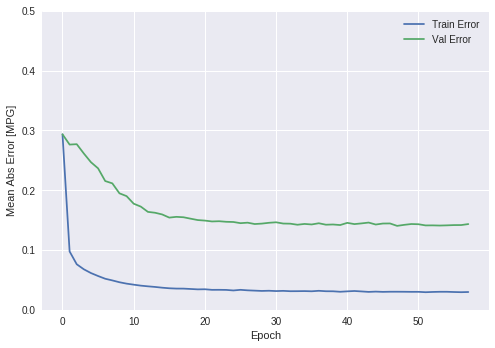

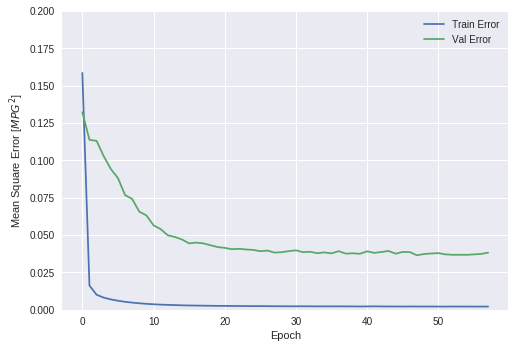

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_x, train_y, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [ ]:
loss, mae, mse = model.evaluate(train_x, train_y, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  0.05 MPG


### Make predictions

Finally, predict MPG values using data in the testing set:

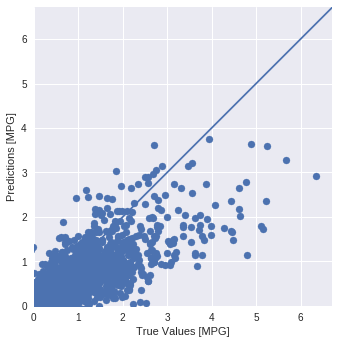

In [ ]:
test_predictions = model.predict(test_x).flatten()

plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [ ]:
error2 = np.subtract(test_predictions,test_y)

ValueError: ignored

In [ ]:
print(test_predictions.shape,test_y.shape)

(1280,) (1280, 1)


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

In [ ]:
error = test_predictions - test_y
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

ValueError: ignored